In [275]:
# Importación de librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt




In [276]:
# Cargar el dataset
df = pd.read_csv('./data/clean.csv')  # Cambia 'ruta_al_archivo' por el path de tu archivo

# Exploración inicial
print(df.head())







   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [277]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [278]:
# Lista todas las columnas
print(df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [311]:
# Contar la cantidad de columnas por tipo de dato
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)


int64    35
Name: count, dtype: int64


In [312]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [281]:
# Suponiendo que df es tu DataFrame
object_columns = df.select_dtypes(include=['object']).columns

# Convertir el índice a una lista si deseas
object_columns_list = object_columns.tolist()

# Imprimir las columnas de tipo object
print(object_columns_list)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [282]:
# Obtener valores únicos de una columna específica
unique_values = df['Attrition'].unique()
print(unique_values)


['Yes' 'No']


In [283]:
# Obtener valores únicos de una columna específica
unique_values = df['BusinessTravel'].unique()
print(unique_values)


['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [284]:
# Obtener valores únicos de una columna específica
unique_values = df['Department'].unique()
print(unique_values)


['Sales' 'Research & Development' 'Human Resources']


In [285]:
# Obtener valores únicos de una columna específica
unique_values = df['EducationField'].unique()
print(unique_values)


['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


In [286]:
# Obtener valores únicos de una columna específica
unique_values = df['Gender'].unique()
print(unique_values)


['Female' 'Male']


In [287]:
unique_values = df['JobRole'].unique()
print(unique_values)


['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


In [288]:
unique_values = df['MaritalStatus'].unique()
print(unique_values)



['Single' 'Married' 'Divorced']


In [289]:
unique_values = df['Over18'].unique()
print(unique_values)




['Y']


In [290]:
unique_values = df['OverTime'].unique()
print(unique_values)


['Yes' 'No']


# Tenemos que convertir variables categóricas a númericas.

In [308]:
# Convertir la variable objetivo a binaria nuevamente antes de dividir en X e y
# Usar replace para convertir variables categóricas a numéricas
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df['Department'] = df['Department'].replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2})
df['EducationField'] = df['EducationField'].replace({'Other': 0, 'Life Sciences': 1, 'Medical': 2, 
                                                      'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5})
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['JobRole'] = df['JobRole'].replace({'Sales Executive': 0, 'Research Scientist': 1, 
                                        'Laboratory Technician': 2, 'Manufacturing Director': 3, 
                                        'Healthcare Representative': 4, 'Manager': 5, 
                                        'Sales Representative': 6, 'Research Director': 7, 
                                        'Human Resources': 8})
df['MaritalStatus'] = df['MaritalStatus'].replace({'Single': 0, 'Married': 1, 'Divorced': 2})
df['Over18'] = df['Over18'].replace({'Y': 1})
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})

# Selección de variables relevantes
X = df[['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
        'EducationField', 'EmployeeCount','EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 
        'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
        'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'StockOptionLevel', 'StandardHours',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
        'YearsWithCurrManager']]
y = df['Attrition']


In [309]:

#Calcular la correlación
correlation_matrix = df.corr()
print(correlation_matrix)


                               Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205       -0.011807   0.010661   
Attrition                -0.159205   1.000000        0.127006  -0.056652   
BusinessTravel           -0.011807   0.127006        1.000000  -0.015539   
DailyRate                 0.010661  -0.056652       -0.015539   1.000000   
Department                0.031882  -0.063991        0.002640  -0.007109   
DistanceFromHome         -0.001686   0.077924       -0.009696  -0.004985   
Education                 0.208034  -0.031373       -0.008670  -0.016806   
EducationField            0.006751   0.086359       -0.018430  -0.017943   
EmployeeCount                  NaN        NaN             NaN        NaN   
EmployeeNumber           -0.010145  -0.010577       -0.018538  -0.050990   
EnvironmentSatisfaction   0.010146  -0.103369       -0.011310   0.018355   
Gender                    0.036311  -0.029453        0.044896   0.011716   
HourlyRate  

In [304]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.011807,0.010661,0.031882,-0.001686,0.208034,0.006751,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.127006,-0.056652,-0.063991,0.077924,-0.031373,0.086359,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,0.002640,-0.009696,-0.008670,-0.018430,NaN,-0.018538,...,0.008926,NaN,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
DailyRate,0.010661,-0.056652,-0.015539,1.000000,-0.007109,-0.004985,-0.016806,-0.017943,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031882,-0.063991,0.002640,-0.007109,1.000000,-0.017225,-0.007996,-0.057197,NaN,0.010895,...,0.022414,NaN,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,-0.017225,1.000000,0.021042,0.016556,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.008670,-0.016806,-0.007996,0.021042,1.000000,-0.005477,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.006751,0.086359,-0.018430,-0.017943,-0.057197,0.016556,-0.005477,1.000000,NaN,0.007778,...,0.024609,NaN,0.026710,0.001367,0.003143,0.019488,0.009311,0.001687,0.012719,0.001673
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.018538,-0.050990,0.010895,0.032916,0.042070,0.007778,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


In [315]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

# División del dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: codificación de variables categóricas y escalado
categorical_features = ['BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]) 



In [316]:
# Pipeline con preprocesamiento y modelo de regresión logística
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='liblinear'))])

# Entrenamiento del modelo
pipeline.fit(X_train, y_train)

# Predicción y evaluación en el conjunto de prueba
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Extracción de coeficientes y sesgo
model = pipeline.named_steps['classifier']  # Acceder al clasificador
preprocessor = pipeline.named_steps['preprocessor']  # Acceder al preprocesador

# Obtener los coeficientes
coef = model.coef_[0]
intercept = model.intercept_[0]

# Obtener nombres de las características
feature_names = (list(numerical_features) + 
                 list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)))

# Mostrar los coeficientes y el sesgo
print('Weight Coefficients:', coef)
print('Bias (Intercept):', intercept)

# Imprimir la fórmula de la regresión
formula = f"y = {intercept:.5f} + " + " + ".join([f"{coef[i]:.5f} * {feature_names[i]}" for i in range(len(coef))])
print("Regression Formula:", formula)


Accuracy: 0.8775510204081632
Recall: 0.38461538461538464
F1 Score: 0.45454545454545453
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.56      0.38      0.45        39

    accuracy                           0.88       294
   macro avg       0.73      0.67      0.69       294
weighted avg       0.86      0.88      0.87       294

Weight Coefficients: [-0.24466364 -0.09933782  0.31303903  0.24322274  0.         -0.36385791
 -0.34160409 -0.16360713 -0.41530815 -0.00306959  0.47389653  0.
 -0.0650013   0.         -0.1799299  -0.38268345 -0.19400631 -0.24020147
  0.57746765 -0.56230301  0.46855826 -0.43038758  0.44865599  1.23965061
 -0.66499884 -0.2426962  -0.40858571  0.03981686  1.01108312 -0.23506211
 -0.79387153 -0.32618513  0.79192344 -0.90913837  0.21274208 -0.86334495
 -1.23900881  1.94237158]
Bias (Intercept): -2.3937285186400064
Regression Formula: y = -2.39373 + -0.24466 * Age + -0.09934 * DailyRat

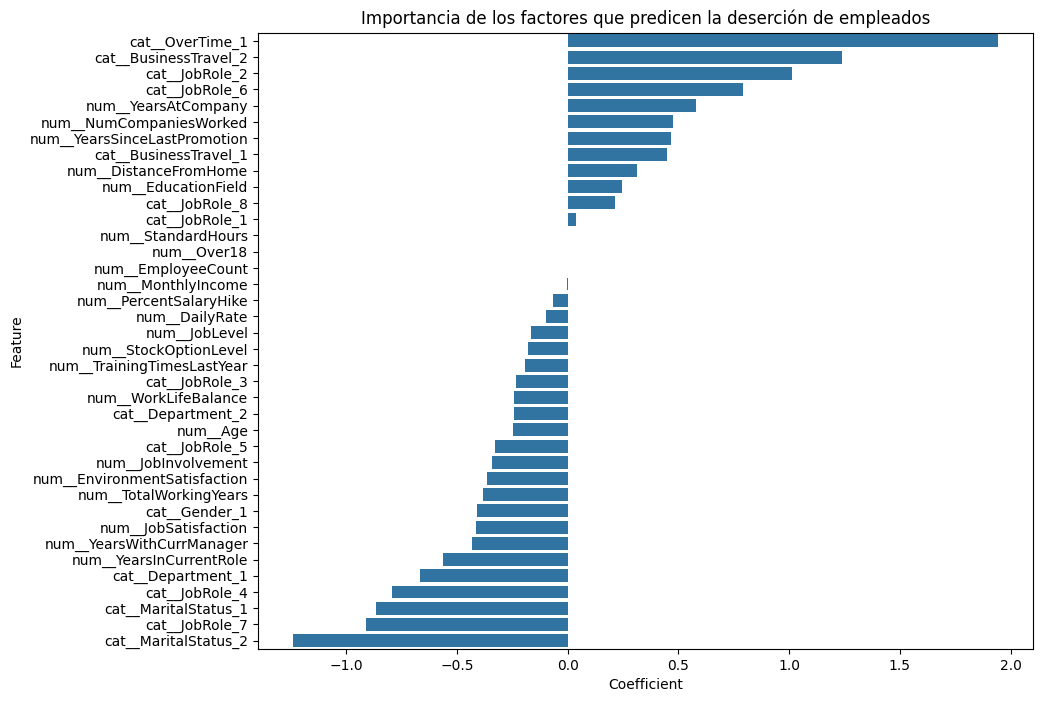

In [317]:


# Coeficientes del modelo (factores importantes)
model = pipeline.named_steps['classifier']
preprocessed_features = pipeline.named_steps['preprocessor'].get_feature_names_out()
coef_importances = pd.DataFrame({'Feature': preprocessed_features, 'Coefficient': model.coef_[0]})
coef_importances = coef_importances.sort_values(by='Coefficient', ascending=False)

# Visualización de los factores más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_importances)
plt.title('Importancia de los factores que predicen la deserción de empleados')
plt.show()

In [319]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# División del dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f'Original dataset shape: {Counter(y_train)}')
print(f'Resampled dataset shape: {Counter(y_train_res)}')


Original dataset shape: Counter({0: 978, 1: 198})
Resampled dataset shape: Counter({0: 978, 1: 978})


In [320]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Crear el pipeline de preprocesamiento
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression(solver='liblinear'))])

# Definir los hiperparámetros a optimizar
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__class_weight': ['balanced', None]  # Probar con y sin ajuste de pesos
}

# Realizar Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Mejor modelo y sus parámetros
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best parameters: {'classifier__C': 0.01, 'classifier__class_weight': None}


In [322]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Predecir probabilidades en el conjunto de prueba
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calcular precisión y recall para diferentes umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Elegir el umbral que maximiza el F1 Score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f'Optimal threshold: {best_threshold}')

# Usar el umbral ajustado para hacer las predicciones finales
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# Evaluación del modelo ajustado
print("Accuracy (adjusted threshold):", accuracy_score(y_test, y_pred_adjusted))
print("Recall (adjusted threshold):", recall_score(y_test, y_pred_adjusted))
print("F1 Score (adjusted threshold):", f1_score(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))


Optimal threshold: 0.5156746638932193
Accuracy (adjusted threshold): 0.8469387755102041
Recall (adjusted threshold): 0.6666666666666666
F1 Score (adjusted threshold): 0.5360824742268041
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       255
           1       0.45      0.67      0.54        39

    accuracy                           0.85       294
   macro avg       0.70      0.77      0.72       294
weighted avg       0.88      0.85      0.86       294

